

# Investigate a Dataset (Medical Appointment No Shows)

## Contents :
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project we analyze Medical Appointment No Shows Dataset and communicate my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn.                                
The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

## Dictionary
PatientId: Identification of a patient.
AppointmentID: Identification of each appointment.
Gender: Male (M) or Female (F).
ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
Age: How old is the patient.
Neighbourhood: Where the appointment takes place.
Scholarship: True (1) of False (0). 
Observation, this is a broad topic, consider reading this article here.
Hipertension: True (1) or False (0).
Diabetes: True (1) or False (0).
Alcoholism: True (1) or False (0).
Handcap: The handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2, here.
SMS_received: 1 or more messages sent to the patient.
No-show: Yes or No.

## Answering these questions
Can the gender be considered as a factor to predict if a patient will show up for their scheduled appointment?   

Can the age be considered as a factor to predict if a patient will show up for their scheduled appointment?

 
Can having a scholarship be considered as a factor to predict if a patient will show up for their scheduled appointment?

In [390]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
First we made sure of Data types, no nulls inputs, no duplicates and we had figured how the data looks and asked question we need to resolve.
### General Properties 

In [391]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [392]:
# check last rows
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [393]:
# shape of df
df.shape

(110527, 14)

In [394]:
# data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [395]:
# number of unique values for each column 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

PatientId          62299  AND AppointmentID     110527 ,                             
this means many many patients had more than one appointments ,               
AND this CSV is about 27 Days 

In [396]:
#first day 
df['AppointmentDay'].min()

'2016-04-29T00:00:00Z'

In [397]:
#last day
df['AppointmentDay'].max()

'2016-06-08T00:00:00Z'

In [398]:
#then some days aren't mentioned

In [399]:
# check for lost parts
df.isnull().sum()
# as you see no data entry is missed 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [400]:
# check for duplicated inputs
duplicates = df.duplicated()
duplicates.sum()
# as you see no duplicates

0

In [401]:
df.describe()
# to describe the CSV

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


age has some issues like max is 115 and min is -1 



### Data Cleaning (removing irrelevant columns which we won't use, fixing data in AGE, Fix data types convert object to datetime and keep only the date like scheduled_day and appointment_day, we don't need to know how many handicaps .. )

In [402]:
df.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [403]:
#removing irrelevant columns which we won't use 
df.drop(['PatientId', 'AppointmentID'],axis = 1 , inplace=True)


In [404]:
df.head(0)
#NEW LABELS

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [405]:
#Renaming Labels
def mod_string(col):
    """modifies a given string"""
    if 'Day' in col:  # ScheduledDay, AppointmentDay
        col = (col[:-3] + '_' + col[-3:])  # split the name and put _ 
    if 'No-show' in col :
        col = 'No_show'
    return col
df.rename(columns = lambda x: mod_string(x),inplace=True)
df.head(0)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


fixing data in AGE

In [406]:
# find negative values in age
Error = df.query('Age < 0')
Error

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [407]:
#deleting that error
df.drop(99832, axis = 0 ,inplace=True)


In [408]:
Error = df.query('Age < 0')
Error
# NO MORE ERRORS IN AGE

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


Fix data types
convert object to datetime and keep only the date : scheduled_day ,appointment_day


In [409]:
# convert string to datetime and keep only the date
Data = ['Scheduled_Day','Appointment_Day']
for col in Data:
    df[col] = pd.to_datetime(pd.to_datetime(df[col]).dt.date)
df.dtypes

Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hipertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No_show                    object
dtype: object

In [410]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [411]:
df.dtypes
# Error fixed 

Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hipertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No_show                    object
dtype: object

In [412]:
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

we don't need to know how many handicaps 


In [413]:
df.Handcap = np.where(df['Handcap'] >= 1, 1,0)


In [414]:
df.Handcap.value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

In [415]:
#No_show column contains YES AND NO instead of yes= 1 and No = 0 

In [416]:
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [417]:
df.No_show = np.where(df.No_show == "Yes", 1, 0)

In [418]:
df.No_show.value_counts()
#already changed to zeros and ones

0    88207
1    22319
Name: No_show, dtype: int64

In [419]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

gender column

In [420]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

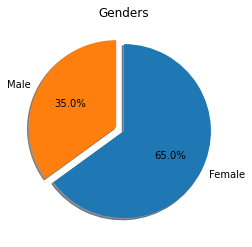

In [421]:
sorted_counts = df.Gender.value_counts()
explode = (0, 0.1)
plt.pie(sorted_counts, labels = ['Female', 'Male'], startangle = 90,
        explode=explode,shadow=True,counterclock = False, autopct='%1.1f%%');
plt.title('Genders');

no_show column

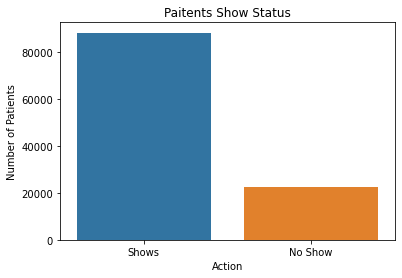

In [422]:
sns.countplot(data = df, x = 'No_show')
plt.xticks([0, 1], ['Shows', 'No Show'])
plt.title('Paitents Show Status')
plt.xlabel('Action')
plt.ylabel('Number of Patients');

Text(0.5, 1.0, 'Histogram Age')

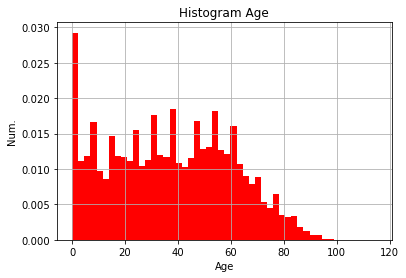

In [423]:
df['Age'].hist(facecolor='r',bins=50,density=True);
plt.xlabel('Age')
plt.ylabel('Num.')
plt.title('Histogram Age')

# Most patients are young

scholarship column


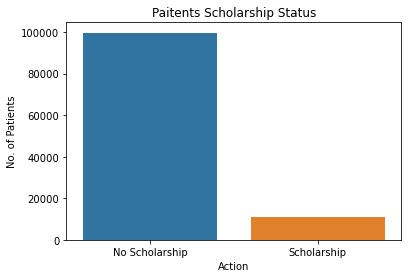

In [424]:
sns.countplot(data = df, x = 'Scholarship')
plt.title('Paitents Scholarship Status')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.xlabel('Action')
plt.ylabel('No. of Patients');

so little number of people has scholarship

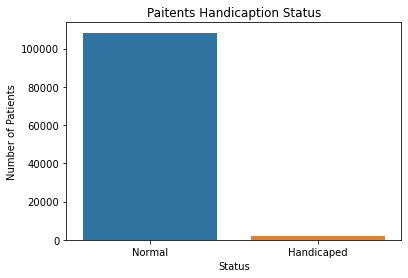

In [425]:
sns.countplot(data = df, x = 'Handcap')
plt.title('Paitents Handicaption Status')
plt.xticks([0, 1], ['Normal', 'Handicaped'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

so little number of Handicaped people 

In [426]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Most patients didn't suffer from alcoholism, diabetes, hypertension, or handicap.

In [427]:
# calculate days between scheduled_day and appointment_day
Days_inbetween = (df['Appointment_Day'] - df['Scheduled_Day']).dt.days
# insert a new column (days_between) before column 3
df.insert(3, 'Days_inbetween', Days_inbetween)
df.head()

,Gender,Scheduled_Day,Appointment_Day,Days_inbetween,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [428]:
# make sure there are no negative values
negative = df.query('Days_inbetween < 0')
negative

,Gender,Scheduled_Day,Appointment_Day,Days_inbetween,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
27033,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,0,0,1,0,1
55226,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,1
64175,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,1
71533,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,1
72362,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0,0,0,0,1


 Five negative days

In [429]:
# drop the rows with negative days
df.drop(negative.index, inplace=True)
# check again
df.query('Days_inbetween < 0')

,Gender,Scheduled_Day,Appointment_Day,Days_inbetween,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


Make age in four groups 

In [430]:
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [431]:
edges = [0, 18, 37, 55, 115]
names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], edges, labels=names)
df.insert(5, 'age_group', age_group)
df.head()

,Gender,Scheduled_Day,Appointment_Day,Days_inbetween,Age,age_group,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,0,62,56 and above,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,0,56,56 and above,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,0,62,56 and above,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,0,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,0,56,56 and above,JARDIM DA PENHA,0,1,1,0,0,0,0


### Research Question 1 (Can the age be used to predict if a patient will show up for their appointment?)

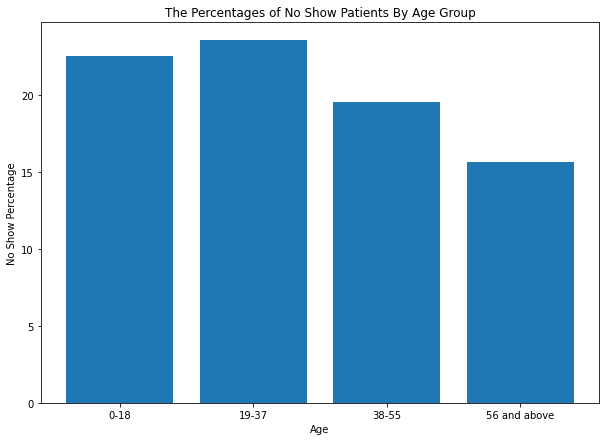

In [432]:
# percentages of no show patients based on age group
no_show_perc_age = df.groupby('age_group').No_show.mean() * 100
plt.figure(figsize = [10, 7])
plt.bar(x = no_show_perc_age.index, height = no_show_perc_age)
plt.title('The Percentages of No Show Patients By Age Group')
plt.xlabel('Age')
plt.ylabel('No Show Percentage');

(56 and above) were the most committed to showing up for their appointments
the older the person is the more likely he is going to show up

### Research Question 2  (Can a scholarship affect if a patient will show up for their scheduled appointment?)

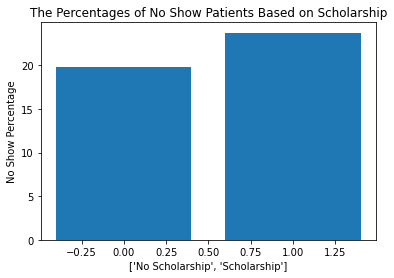

In [433]:
# percentages of no show patients based on scholarship
no_show_perc_scholarship = df.groupby('Scholarship').No_show.mean() * 100
plt.bar(x = no_show_perc_scholarship.index, height = no_show_perc_scholarship)
plt.title('The Percentages of No Show Patients Based on Scholarship')
plt.xlabel(['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');

having a scholarship could help us to predict if a patient will show up for their scheduled appointment.
mostly the scholarship make person shows up 

## Limitations
The analysis scope is limited to the setting in which the data has been gathered. Any findings or trends cannot be induced to a larger population or to another setting.
The analysis is limited to trends and only shows value distributions. Causations cannot be drawn. For this purpose, statistical tests and more thorough data segmentations would be required.

<a id='conclusions'></a>
## Conclusions
In this project I analyzed Medical Appointment No Shows Dataset and communicated my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset contained 110,527 appointments in a period of 40 days, about 20% of the patients didn't show up for their appointments.

## - the younger the patient is the more likely he/she is going to miss the appointment.             
## - it seems like a patient with a scholarship is more likely to not show up for the appointment.

# Most patients:
Were females.

Were young.

Didn't have a scholarship.



Q: Can the gender be considered as a factor to predict if a patient will show up for their scheduled appointment?
## The percentages of no show patients based on gender were pretty close. So, we can say that the gender can't be considered as a factor to predict if a patient will show up for their scheduled appointment.


Q: Can the age be considered as a factor to predict if a patient will show up for their scheduled appointment?
## Yes, the younger the patient is the more likely he/she is going to miss the appointment. Except the group (0-18) since they probably are accompanied by an adult.


Q: Can having a scholarship be considered as a factor to predict if a patient will show up for their scheduled appointment?
## Yes, it seems like a patient with a scholarship is more likely to not show up for the appointment.




## Suggestions
Should to combine analysis of diseases with other attributes such as neighborhood, or including other available dimensions into this analysis.